In [20]:
import tstrippy 
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True

In [85]:
Mt,Rc,NP=1,1,int(1e4)
r = np.logspace(-2,1,1000)
Menc=tstrippy.ergodic.PlummerMassProfile(Mt, Rc,r)
Y = np.random.rand(NP)
r_samp = tstrippy.ergodic.PlummerRadius(Y,Rc)# does the inverse transform sampling
# find the intersection of the cumulative mass profile and the uniform distribution
M_enc_samp = tstrippy.ergodic.PlummerMassProfile(Mt, Rc,r_samp)
# make a nice histogram
nbins= int(np.ceil(np.sqrt(NP)))
# bins = np.logspace(-2,1,nbins)
bins = np.linspace(r_samp.min(),10,nbins)
m_hist = np.histogram(r_samp,bins=bins)[0]

[]

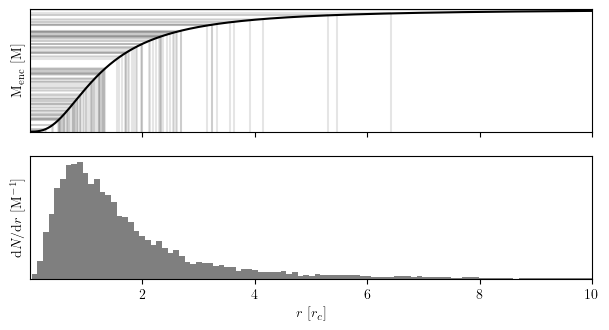

In [92]:
fig,axis=plt.subplots(2,1,figsize=(8.25-1,3.5),sharex=True)
axis[0].plot(r,Menc,label='Menc(r)',color='k');
axis[0].set_xlim(r.min(),r.max())
axis[0].set_ylim(0,1)
axis[0].set_ylabel(r"$\mathrm{M}_\mathrm{enc}~[\mathrm{M}]$")
axis[1].set_xlabel(r"$r~[r_c]$")
nskip = 100
axis[0].hlines(M_enc_samp[::nskip],np.zeros_like(r_samp)[::nskip],r_samp[::nskip],color='k',linestyle='-',alpha=.1)
axis[0].vlines(r_samp[::nskip],np.zeros_like(r_samp)[::nskip],M_enc_samp[::nskip],color='k',linestyle='-',alpha=.1)
axis[1].hist(r_samp,bins=bins,density=True,label='Sampled',color='k',alpha=.5);
axis[1].set_ylabel(r"$\mathrm{d}N/\mathrm{d}r~[\mathrm{M}^{-1}]$")
axis[1].set_yticks([])
axis[0].set_yticks([])


In [ ]:
# now show the sampling of the velocities 
tstrippy.ergodic.velocitySampling()


TypeError: velocitySampling() missing 5 required positional arguments: 'DistFunc', 'Mt', 'Rc', 'rAll', and 'G'